In [25]:
import pymc as pm
import numpy as np
import statsmodels.api as sm
import arviz as az
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

%config InlineBackend.figure_format = 'retina'
az.style.use('arviz-darkgrid')

In [30]:
n_samples = 1000
arparams = np.array([.5, .1])
maparams = np.array([-.2, .1])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag

y = sm.tsa.arma_generate_sample(ar, ma, n_samples)

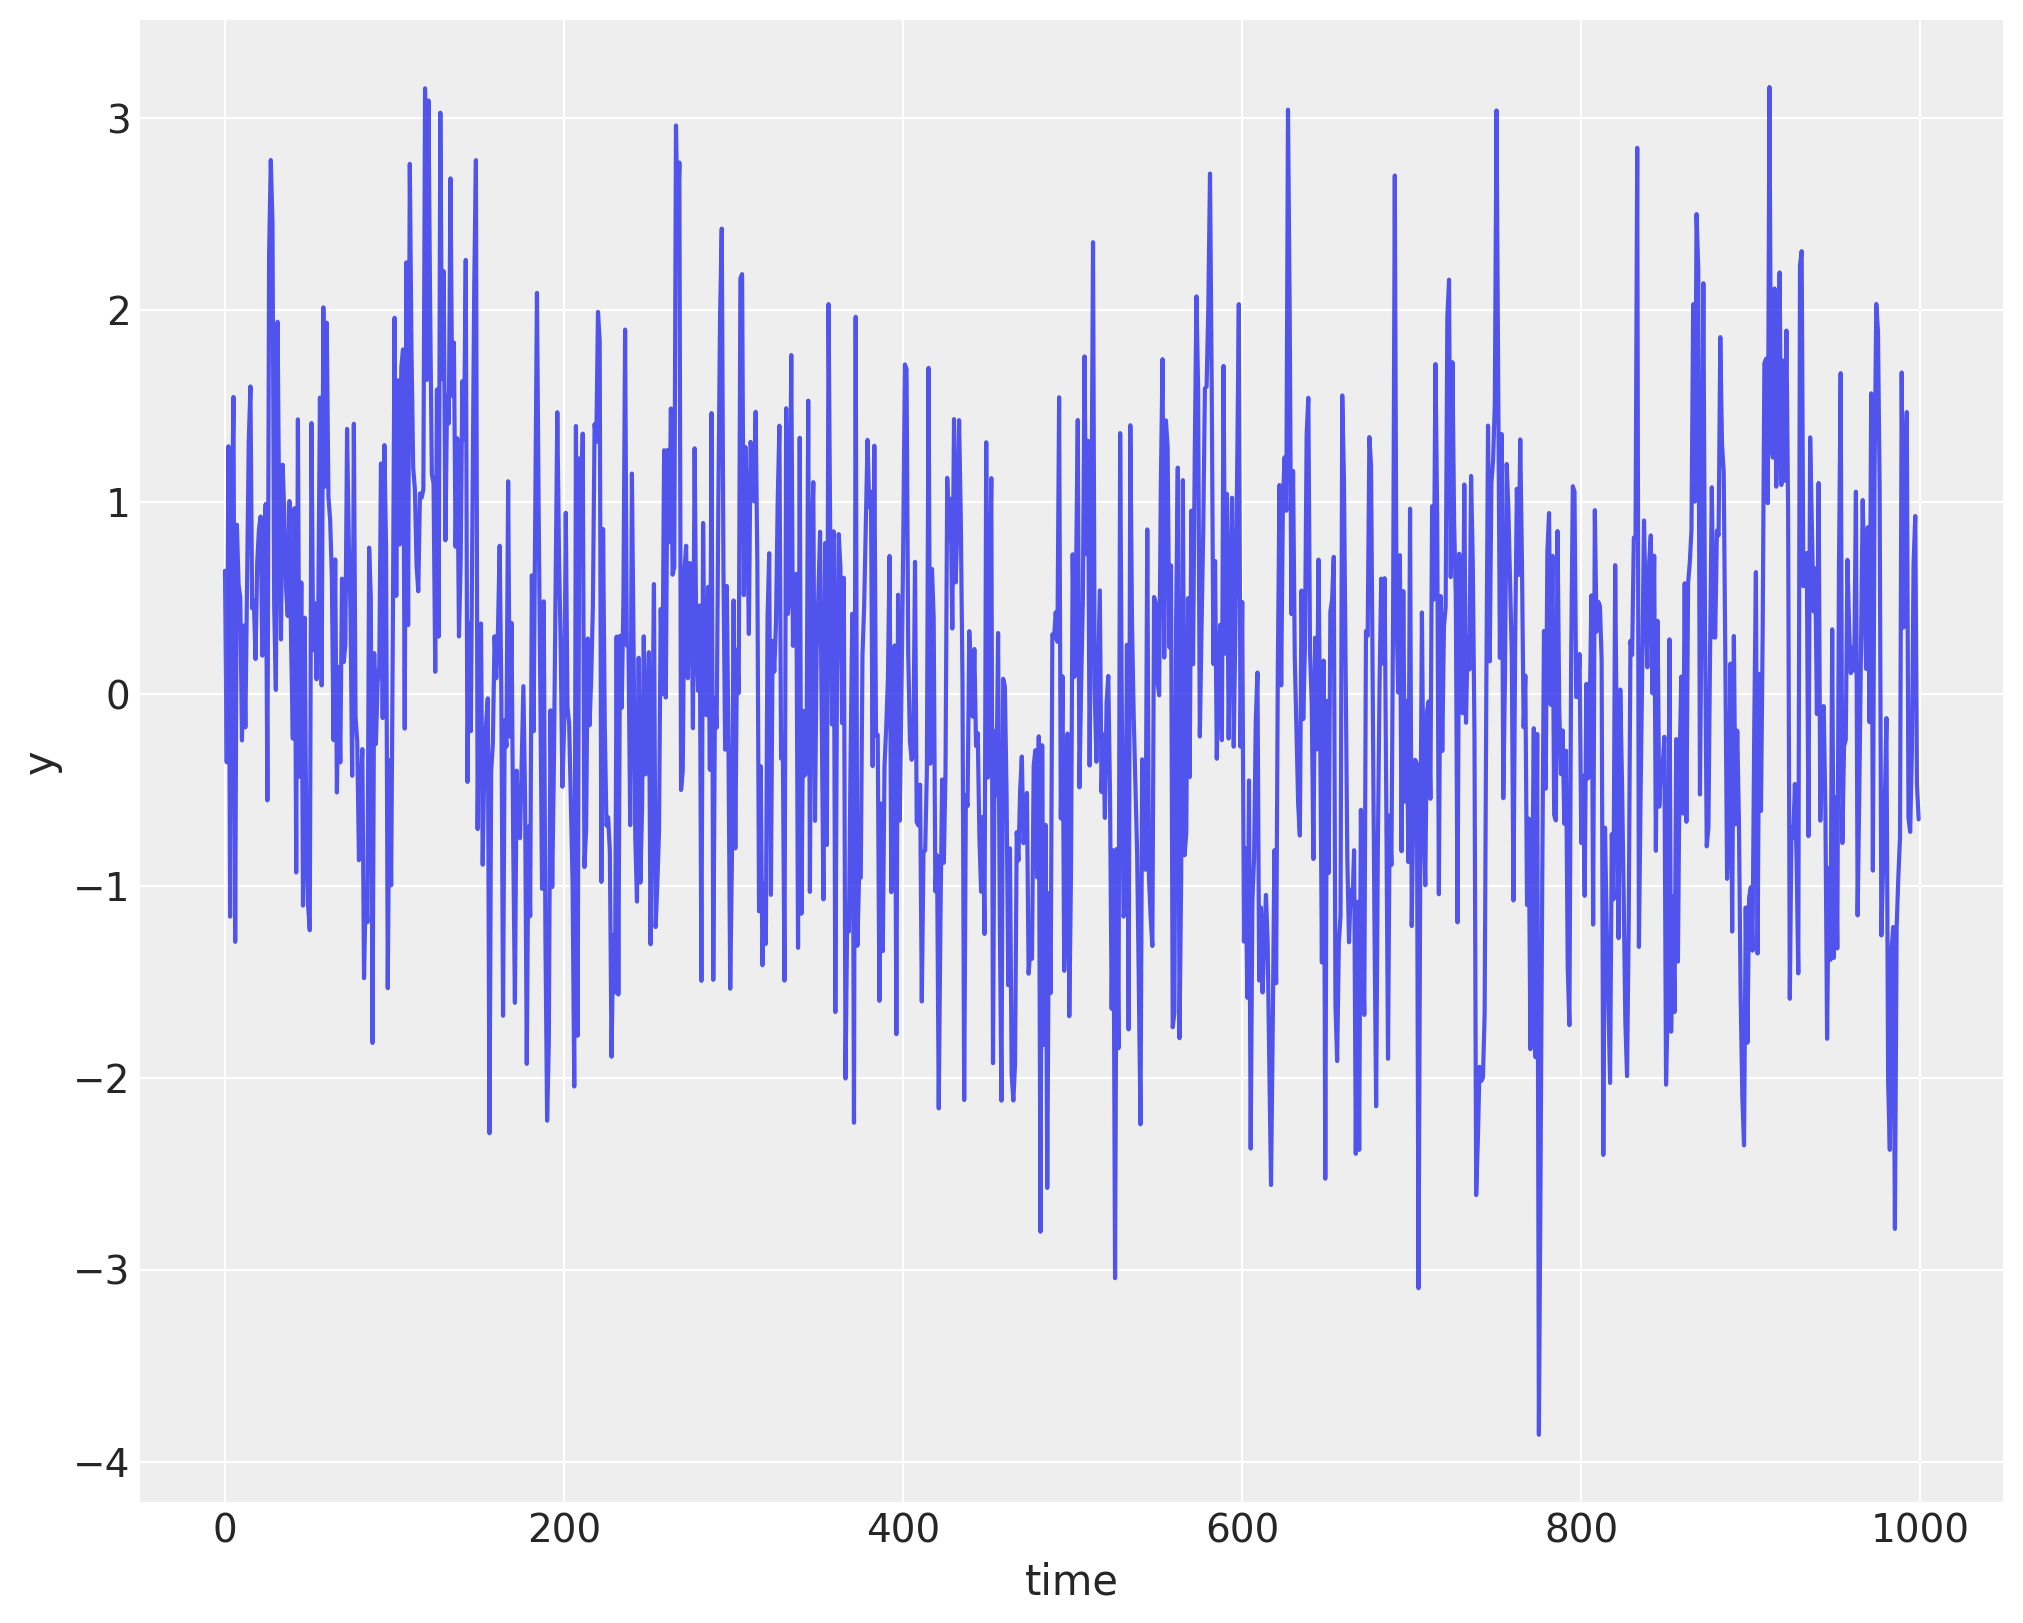

In [31]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(y, alpha=.8)
ax.set(xlabel='time', ylabel='y')
plt.show()

/Users/wang/Library/CloudStorage/GoogleDrive-thetheoryofeverythingcn@gmail.com/My Drive/23 Spring/TimeSeries/Project/Bayesian-inference/.venv/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


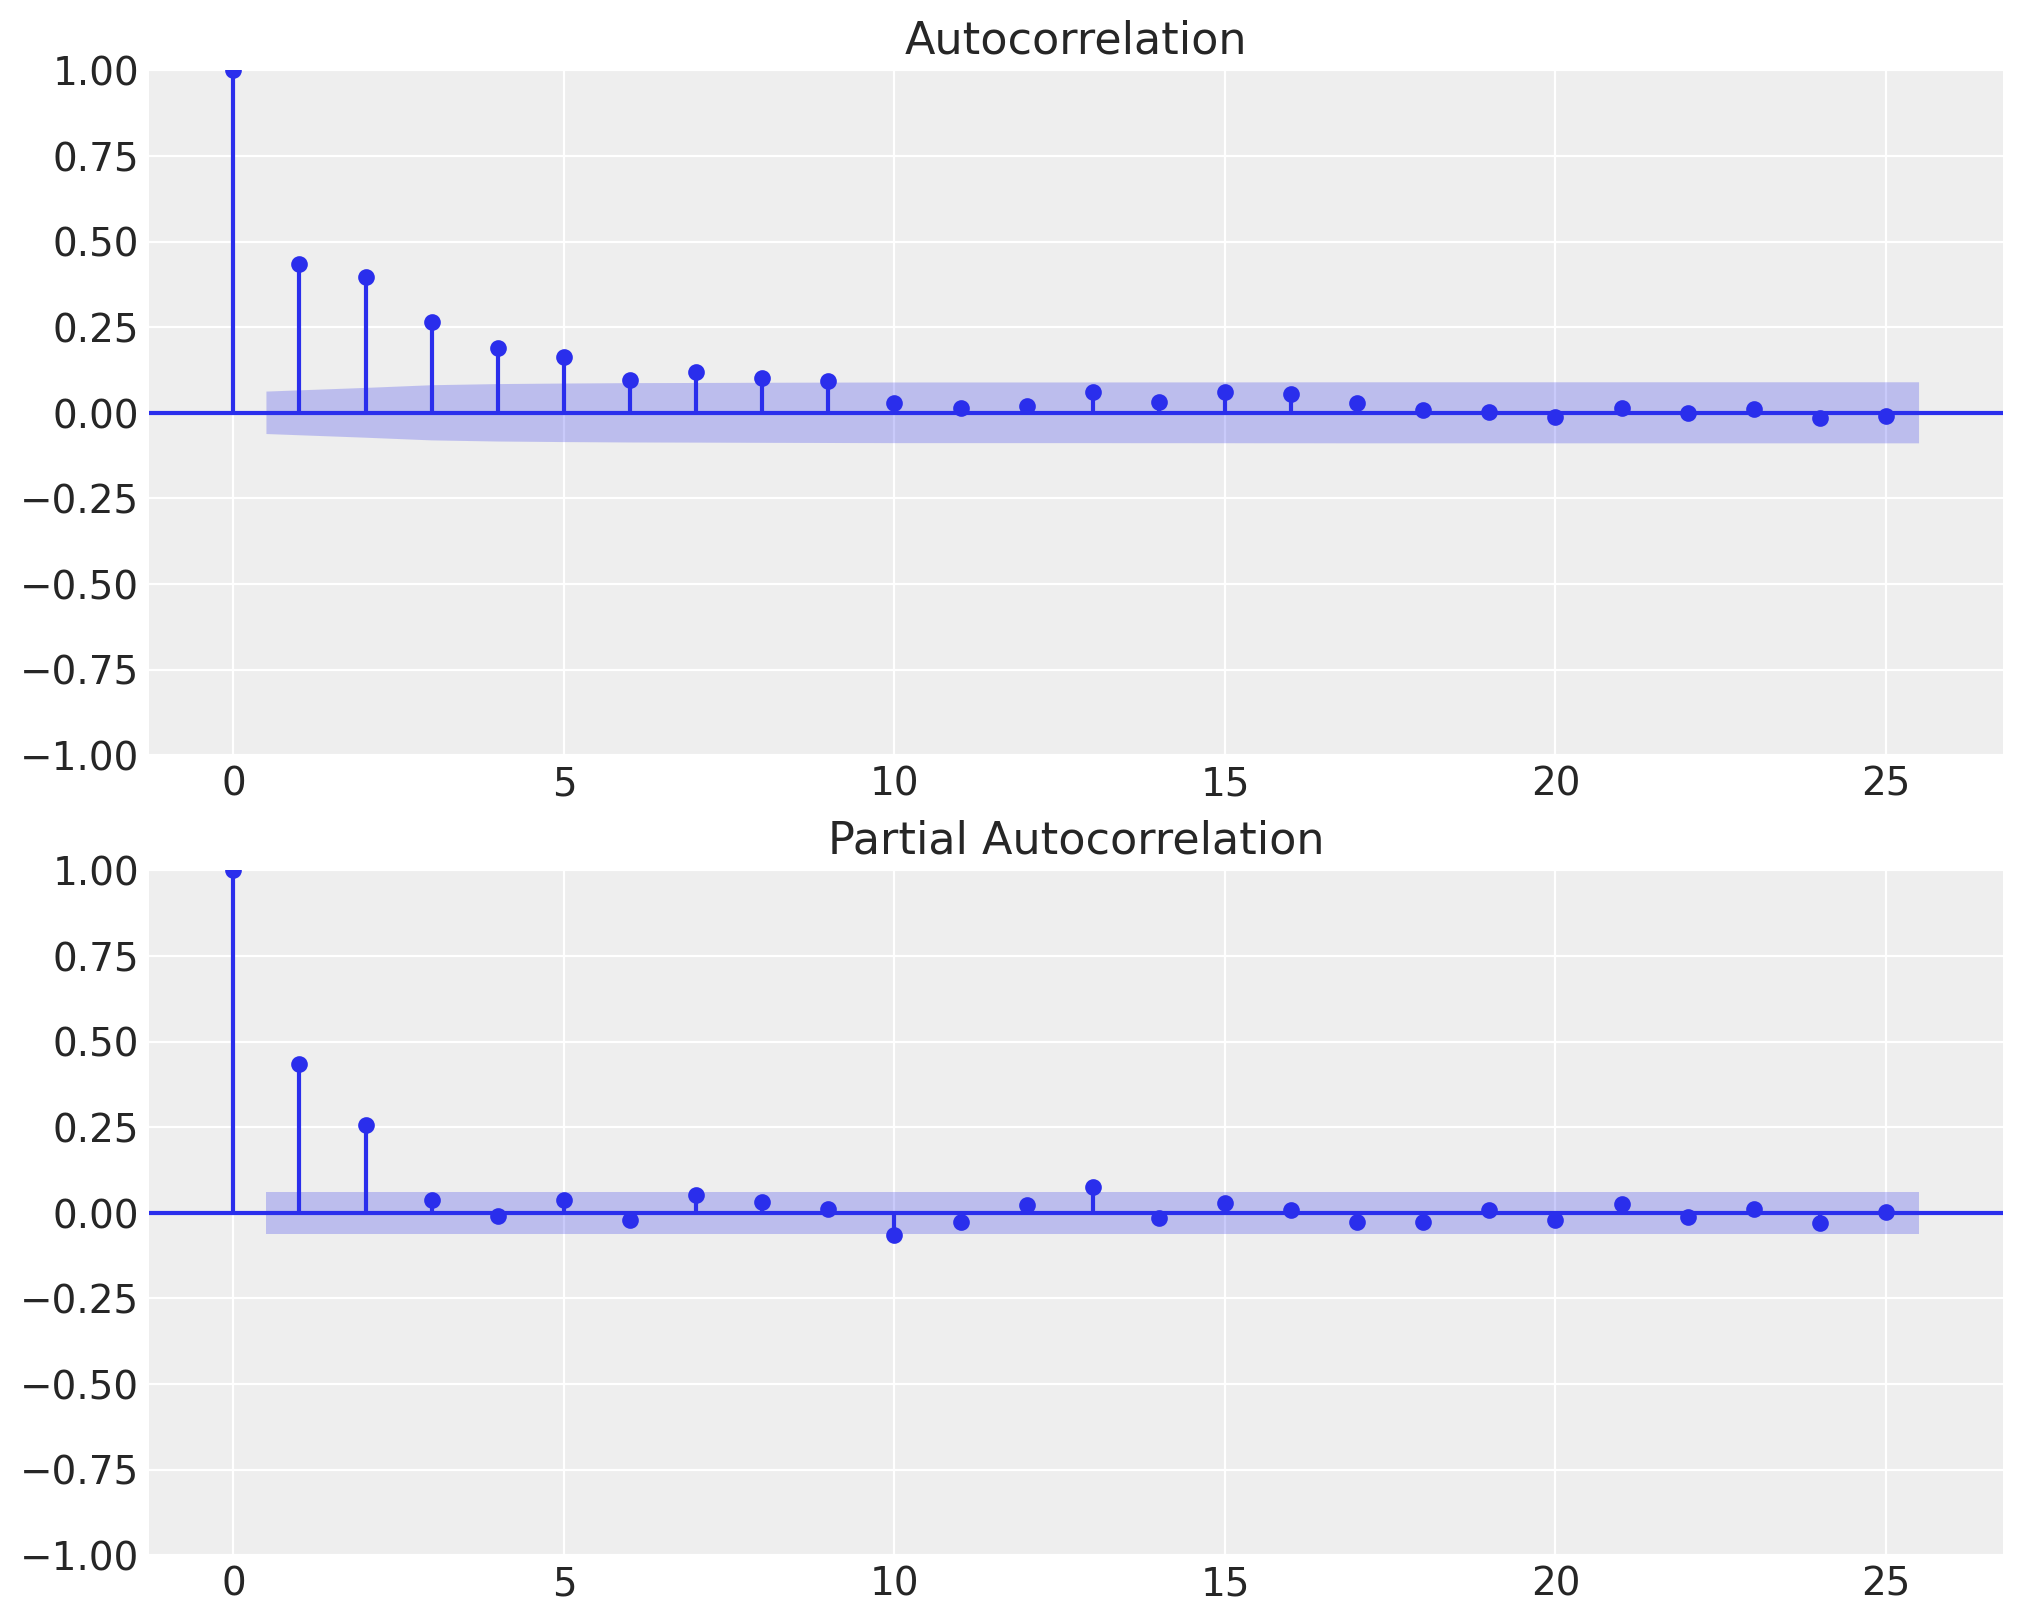

In [32]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,8))
plot_acf(y, ax=ax1, lags=25)
plot_pacf(y, ax=ax2, lags=25)
plt.show()

In [33]:
# fit model
mod = sm.tsa.ARIMA(y, order=(2,0,2), trend='n')
res = mod.fit()

print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1394.293
Date:                Thu, 27 Apr 2023   AIC                           2798.585
Time:                        12:42:09   BIC                           2823.124
Sample:                             0   HQIC                          2807.912
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4711      0.325      1.451      0.147      -0.165       1.107
ar.L2          0.1806      0.265      0.682      0.495      -0.338       0.699
ma.L1         -0.1571      0.327     -0.480      0.6

In [37]:
%load_ext autoreload
%autoreload 2
from arma_inference import run_MCMC_ARMApq

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
model = {'order': [2, 2], 'tab': {'params': [0,0,0,0], 'bse': [1,1,1,1]}}
trace = run_MCMC_ARMApq(y, 2000, model)

[0, 0] [1, 1]


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, phi, theta]
Sampling 4 chains for 400 tune and 2_000 draw iterations (1_600 + 8_000 draws total) took 33 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
phi[0]    0.378  0.355  -0.317    1.000      0.079    0.057      28.0   
phi[1]    0.100  0.149  -0.153    0.364      0.014    0.010     168.0   
theta[0] -0.060  0.356  -0.656    0.658      0.079    0.057      28.0   
theta[1] -0.003  0.111  -0.195    0.250      0.017    0.012      71.0   
sigma     0.978  0.022   0.936    1.019      0.000    0.000    3889.0   

          ess_tail  r_hat  
phi[0]       106.0   1.10  
phi[1]      1825.0   1.03  
theta[0]     109.0   1.10  
theta[1]     142.0   1.04  
sigma       3534.0   1.00  


array([[<Axes: title={'center': 'phi'}>, <Axes: title={'center': 'phi'}>],
       [<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

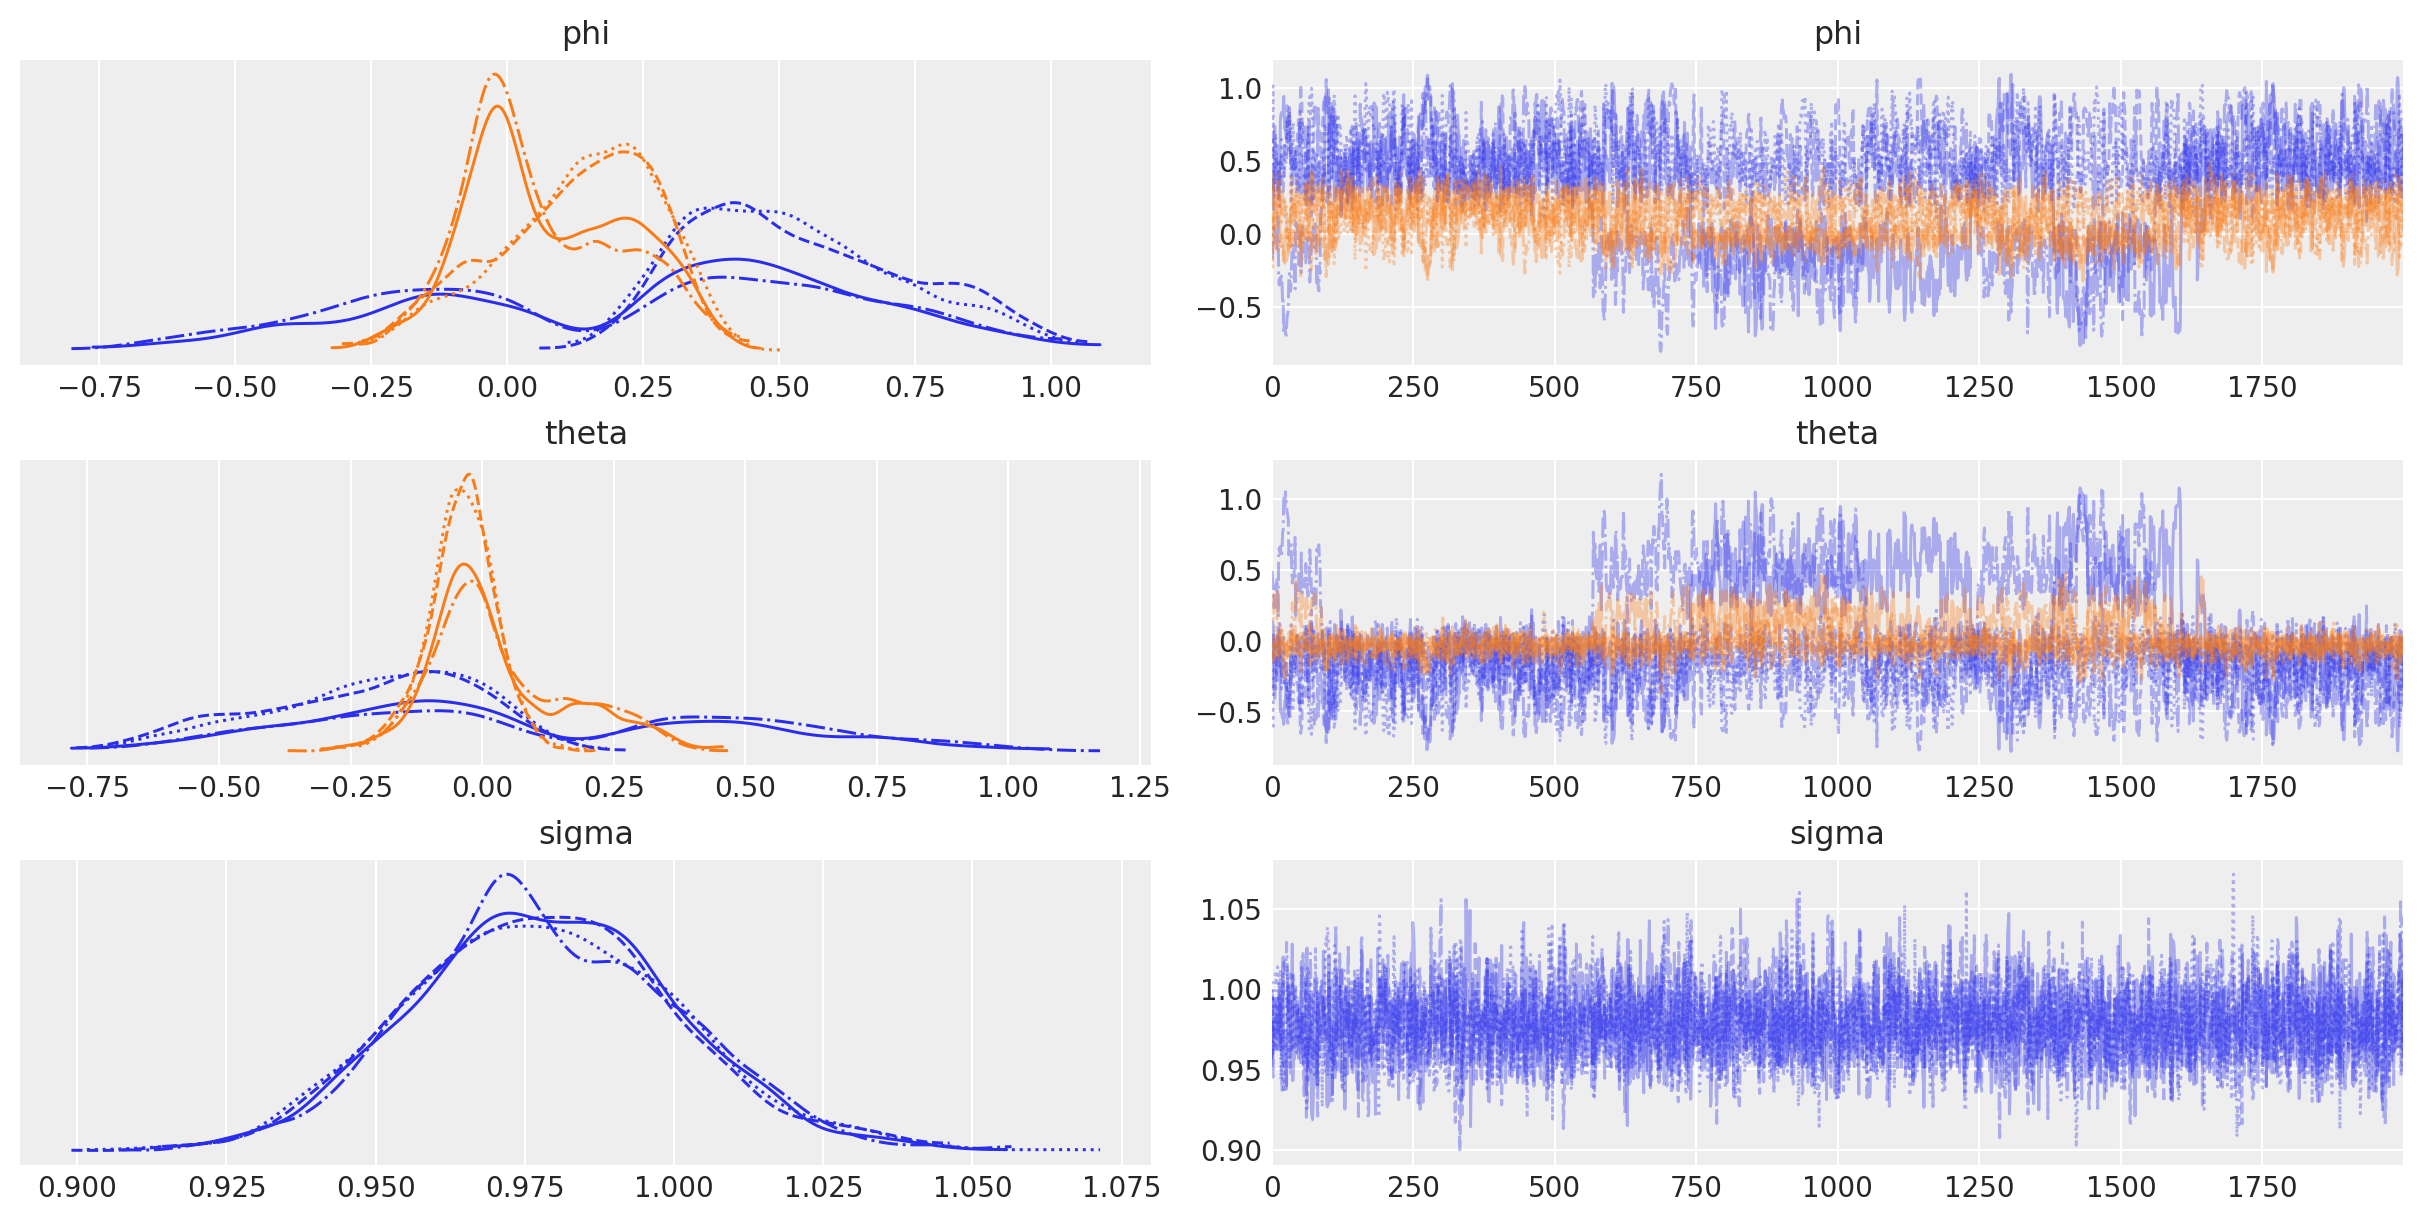

In [39]:
import arviz as az
az.style.use('arviz-darkgrid')
az.plot_trace(trace)